Exactitude : 0.00%


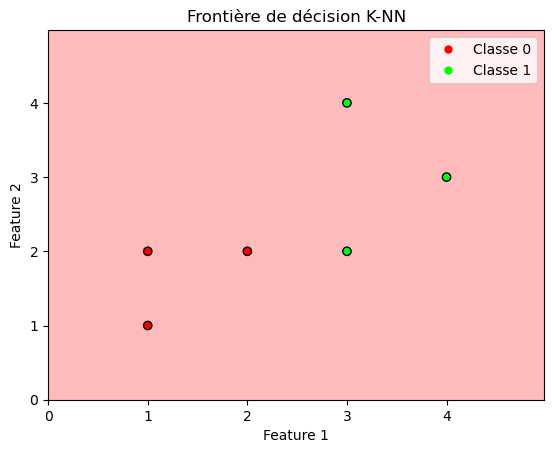

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Exemple de données d'entrée (X) et de labels de sortie correspondants (y)
X = np.array([[1, 1], [1, 2], [2, 2], [4, 3], [3, 2], [3, 4]])
y = np.array([0, 0, 0, 1, 1, 1])

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création d'une instance du modèle K-NN avec k=3
model = KNeighborsClassifier(n_neighbors=3)

# Entraînement du modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = model.predict(X_test)

# Calcul de l'exactitude (accuracy) du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Exactitude : {:.2f}%".format(accuracy * 100))

# Création d'un maillage pour la visualisation
h = 0.02  # pas de la grille
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Prédiction pour chaque point du maillage
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Création d'une carte de couleurs pour les régions de décision
cmap = ListedColormap(['#FFAAAA', '#AAFFAA'])

# Affichage des points de données et de la région de décision
plt.figure()
plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=ListedColormap(['#FF0000', '#00FF00']))
plt.title("Frontière de décision K-NN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Ajout d'une légende pour les classes
class_labels = ['Classe 0', 'Classe 1']
colors = ['#FF0000', '#00FF00']
patches = [plt.plot([], [], marker='o', markersize=5, linestyle='', color=colors[i], label=class_labels[i])[0] for i in range(2)]
plt.legend(handles=patches)

plt.show()
